In [8]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [9]:
dataset=pd.read_csv('/home/jiayi/5moU/data/DL_fromTombo/all_AGTTC.csv')
#dataset=pd.read_csv('/home/jiayi/5moU/data/DL_fromTombo/all_tombo.csv')
dataset

,indx,kmer,mean_1,mean_2,mean_3,mean_4,mean_5,std_1,std_2,std_3,...,mdintense_2,mdintense_3,mdintense_4,mdintense_5,L-1,L-2,L-3,L-4,L-5,label
0,260,AGTTC,0.513199,0.397293,-0.850444,-0.837177,-0.786233,0.047088,0.272815,0.031234,...,0.471305,-0.846254,-0.839970,-0.768751,6,81,6,15,104,1
1,259,AGTTC,0.589209,0.568374,-0.717482,-0.762448,-0.789418,0.062266,0.080098,0.038712,...,0.579342,-0.727349,-0.763294,-0.799239,6,32,6,15,90,1
2,243,AGTTC,0.458838,0.109656,-0.797939,-0.820008,-0.756034,0.149853,0.419986,0.034345,...,0.190347,-0.796560,-0.817250,-0.755180,13,6,6,33,63,1
3,260,AGTTC,0.457595,0.472804,-0.688376,-0.681815,-0.679743,0.060894,0.174125,0.025067,...,0.513802,-0.686393,-0.686393,-0.696311,6,78,6,13,108,1
4,260,AGTTC,0.528384,0.423719,-0.713185,-0.825872,-0.800544,0.029393,0.277885,0.162593,...,0.522379,-0.768558,-0.826600,-0.792575,6,51,6,11,108,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,260,AGTTC,0.787659,0.405793,-0.611869,-0.739305,-0.605124,0.169036,0.279195,0.138040,...,0.463995,-0.667700,-0.744655,-0.604325,32,14,6,11,17,0
2629,161,AGTTC,0.396310,0.499622,-0.619268,-0.546544,-0.762006,0.090910,0.031997,0.130815,...,0.500937,-0.642935,-0.607435,-0.786905,39,6,6,16,16,0
2630,240,AGTTC,0.589990,0.614284,-0.632994,-0.789089,-0.753708,0.172348,0.280588,0.188418,...,0.688070,-0.685807,-0.796713,-0.751445,6,40,6,19,6,0
2631,260,AGTTC,0.661435,0.551367,-0.694797,-0.734620,-0.571503,0.110638,0.231089,0.049018,...,0.548295,-0.676666,-0.739763,-0.576580,33,34,6,11,6,0


In [10]:
X = dataset.iloc[:, 2:-1].values
y = dataset. iloc [:, -1].values

In [11]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.2,
                                                    random_state=1234)

In [12]:
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve

# Instantiate the classfiers and make a list
classifiers = [svm.SVC(probability=True), 
               RandomForestClassifier(n_estimators=100),
               XGBClassifier(learning_rate=0.01,
                      n_estimators=10,           # 树的个数-10棵树建立xgboost
                      max_depth=4,               # 树的深度
                      min_child_weight = 1,      # 叶子节点最小权重
                      gamma=0.,                  # 惩罚项中叶子结点个数前的参数
                      subsample=1,               # 所有样本建立决策树
                      colsample_btree=1,         # 所有特征建立决策树
                      scale_pos_weight=1,        # 解决样本个数不平衡的问题
                      random_state=27,           # 随机数
                      slient = 0)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc','precision','recall','AUPRC'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    ###
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    AUC = roc_auc_score(y_test, yproba)
    ###
    precision, recall, thresholds = precision_recall_curve(y_test,yproba)
    AUPRC=AUPRC_SVM=auc(recall,precision)

    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':AUC,
                                       'precision':precision,
                                       'recall': recall,
                                       'AUPRC': AUPRC}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

[09:45:55] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_btree", "slient" } are not used.



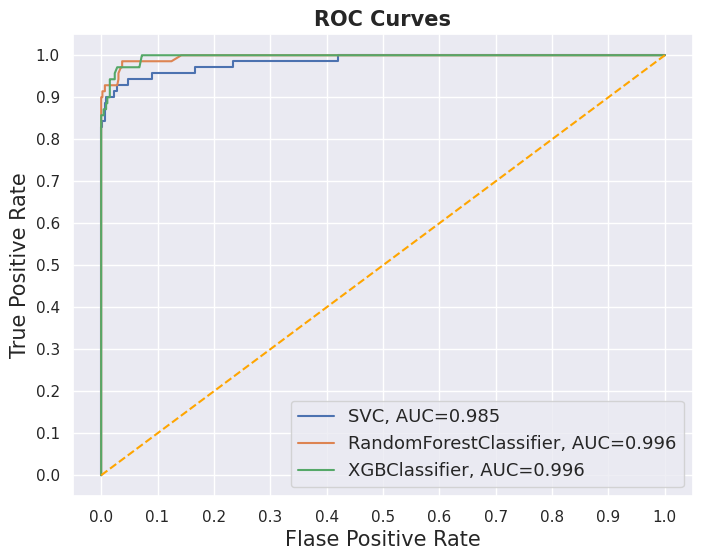

In [13]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curves', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

References:
[1] https://www.imranabdullah.com/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot

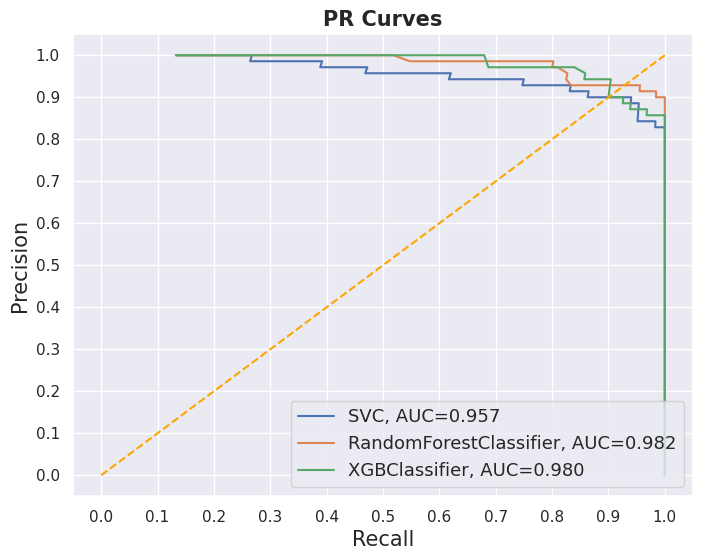

In [14]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['precision'], 
             result_table.loc[i]['recall'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['AUPRC']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=15)

plt.title('PR Curves', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()